In [ ]:
!git clone https://github.com/ChronoStellar/Automatic-License-Plate-Recognition

Cloning into 'Automatic-License-Plate-Recognition'...
remote: Enumerating objects: 437, done.
remote: Counting objects: 100% (437/437), done.
remote: Compressing objects: 100% (434/434), done.
remote: Total 437 (delta 3), reused 422 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (437/437), 14.02 MiB | 8.96 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
!pip install evaluate jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
import os
import evaluate
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
# Process Dataset
PATH = '/content/Automatic-License-Plate-Recognition/dataset/test'
images = []
labels = []

for filename in os.listdir(PATH):
  if filename.lower().endswith('.jpeg'):
    labels.append(filename[:-5])
  else:
    labels.append(filename[:-4])

  images.append(os.path.join(PATH, filename))

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np

def load_templates(template_base_dir):
    templates = {}

    for char_dir in os.listdir(template_base_dir):
        char_path = os.path.join(template_base_dir, char_dir)
        if os.path.isdir(char_path):
            templates[char_dir] = []
            for filename in os.listdir(char_path):
                if filename.endswith(".png") or filename.endswith(".jpg"):
                    template_img = cv2.imread(os.path.join(char_path, filename), cv2.IMREAD_GRAYSCALE)
                    if template_img is not None:
                        templates[char_dir].append(template_img)

    return templates

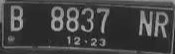

Recognized text: 


In [ ]:
# Function to perform template matching and recognize characters

def template_matching_ocr(image_path, templates, threshold=0.7):
    # Load the input image
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if input_image is None:
        print(f"Error: Unable to load image {image_path}")


        return

    recognized_text = ""
    h_input, w_input = input_image.shape

    # Iterate over each character class (0-9)
    for char_class, template_list in templates.items():
        best_match_val = 0
        best_char = None
        best_loc = None

        # Iterate over the templates for the current character class
        for template in template_list:
            h_template, w_template = template.shape

            # Make sure template is smaller than the input image
            if h_template <= h_input and w_template <= w_input:
                # Perform template matching
                result = cv2.matchTemplate(input_image, template, cv2.TM_CCOEFF_NORMED)
                min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

                # Update the best match if found
                if max_val > best_match_val:
                    best_match_val = max_val
                    best_char = char_class
                    best_loc = max_loc

        # Threshold and select the character with the best match
        if best_match_val > threshold:
            recognized_text += best_char
            h, w = template.shape
            # Optionally, draw rectangle around matched region
            cv2.rectangle(input_image, best_loc, (best_loc[0] + w, best_loc[1] + h), (255, 0, 0), 2)

    # Show the input image with rectangles drawn (optional)
    cv2_imshow(input_image)

    return recognized_text

# Set paths
template_dir = '/content/Automatic-License-Plate-Recognition/dataset/Char'  # Update this path to your dataset folder
input_image_path = '/content/Automatic-License-Plate-Recognition/dataset/test/B8837NR.jpg'  # Path to the image you want to recognize text from

# Load templates from dataset directory
templates = load_templates(template_dir)

# Perform OCR using template matching
recognized_text = template_matching_ocr(input_image_path, templates)

# Output the recognized text
print(f"Recognized text: {recognized_text}")

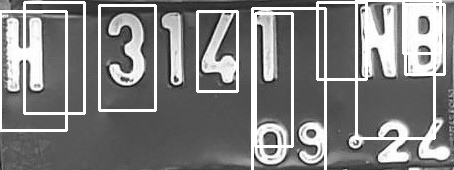

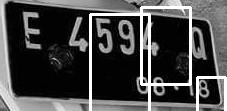

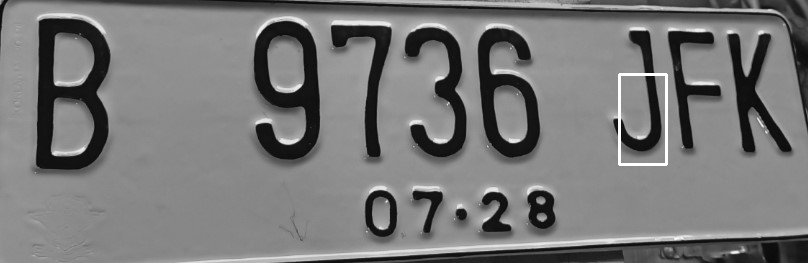

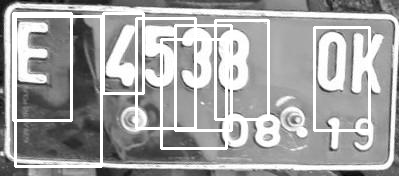

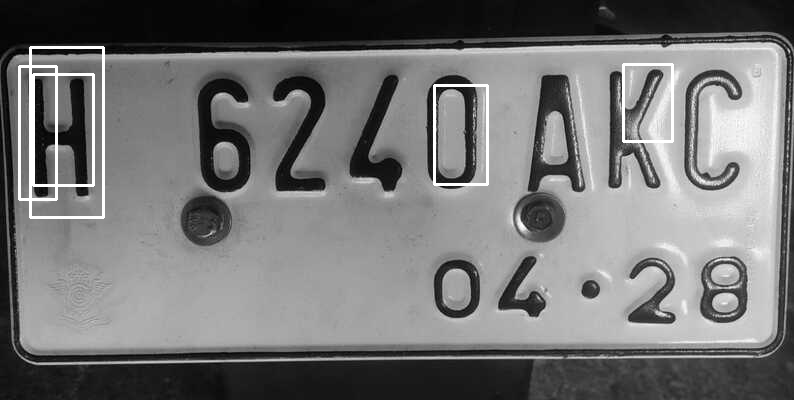

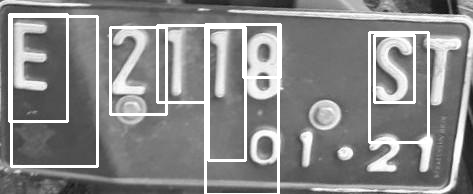

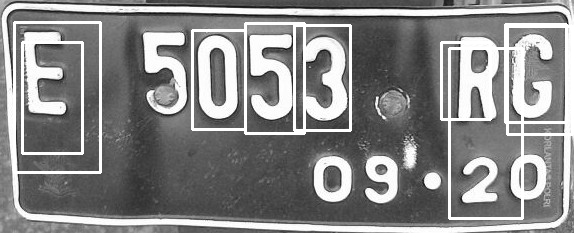

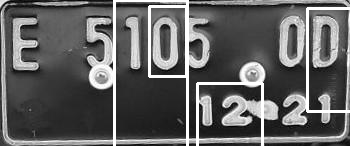

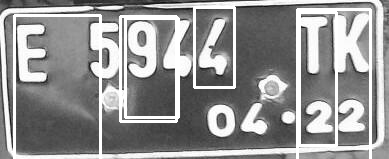

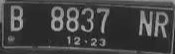

10

In [ ]:
result = []
for i in images:
  result.append(template_matching_ocr(i, templates))
len(result)

In [ ]:
import evaluate
wer = evaluate.load('wer')
cer = evaluate.load('cer')

In [ ]:
word_accuracy = wer.compute(references=labels, predictions=result)
character_accuracy = cer.compute(references=labels, predictions=result)

print(f'wer: {word_accuracy}, cer: {character_accuracy}')

wer: 1.0, cer: 0.9859154929577465


In [ ]:
for i,x in enumerate(zip(result, labels)):
  print(i,x)

0 ('O31TB4LHIN', 'H3141NB')
1 ('5T9', 'E4594Q')
2 ('J', 'B9736JFK')
3 ('538FD4EX', 'E4538QK')
4 ('1T8LI', 'H6240AKC')
5 ('5O1TSFZEI', 'E2118ST')
6 ('531T8L0EC', 'E5053RG')
7 ('1DGX', 'E5105OD')
8 ('3184EI', 'E5944TK')
9 ('', 'B8837NR')
